# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
temp_units = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# Initial df lists
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# Initial count
count_one = 0
set_one = 1

# Loop through for df
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
        
# Complete print
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | tuatapere
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | xuddur
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | cagayan de tawi-tawi
Processing Record 6 of Set 1 | vryburg
Processing Record 7 of Set 1 | komsomolskiy
Processing Record 8 of Set 1 | nanortalik
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | kaitangata
City not found. Skipping...
Processing Record 11 of Set 1 | beloha
City not found. Skipping...
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | piacabucu
City not found. Skipping...
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | shemordan
Processing Record 19 of Set 1 | yulara
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | katsuura
Processing Recor

Processing Record 38 of Set 4 | machaneng
Processing Record 39 of Set 4 | kudahuvadhoo
Processing Record 40 of Set 4 | port-gentil
City not found. Skipping...
Processing Record 41 of Set 4 | yellowknife
Processing Record 42 of Set 4 | shubarshi
Processing Record 43 of Set 4 | mudgee
City not found. Skipping...
City not found. Skipping...
Processing Record 44 of Set 4 | shakhovskaya
Processing Record 45 of Set 4 | eregli
City not found. Skipping...
Processing Record 46 of Set 4 | zhangzhou
Processing Record 47 of Set 4 | yerbogachen
Processing Record 48 of Set 4 | tarakan
Processing Record 49 of Set 4 | salvador
Processing Record 1 of Set 5 | guapiles
Processing Record 2 of Set 5 | dunedin
Processing Record 3 of Set 5 | saldanha
Processing Record 4 of Set 5 | chuy
Processing Record 5 of Set 5 | seminole
City not found. Skipping...
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | lagoa
City not found. Skipping...
Processing Record 8 of Set 5 | college
Processing Reco

Processing Record 20 of Set 8 | kaeo
Processing Record 21 of Set 8 | roseto degli abruzzi
Processing Record 22 of Set 8 | studena
Processing Record 23 of Set 8 | goderich
Processing Record 24 of Set 8 | byron bay
Processing Record 25 of Set 8 | itarema
Processing Record 26 of Set 8 | uige
Processing Record 27 of Set 8 | estelle
Processing Record 28 of Set 8 | yar-sale
Processing Record 29 of Set 8 | mabaruma
Processing Record 30 of Set 8 | talnakh
City not found. Skipping...
Processing Record 31 of Set 8 | aksarka
Processing Record 32 of Set 8 | dudinka
City not found. Skipping...
Processing Record 33 of Set 8 | staunton
Processing Record 34 of Set 8 | valdivia
Processing Record 35 of Set 8 | viedma
Processing Record 36 of Set 8 | evensk
Processing Record 37 of Set 8 | puchov
Processing Record 38 of Set 8 | pacatuba
Processing Record 39 of Set 8 | lavrentiya
Processing Record 40 of Set 8 | monte azul
Processing Record 41 of Set 8 | chapais
Processing Record 42 of Set 8 | souillac
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

city_df = pd.DataFrame(city_dict)


# Export the city data into a .csv
city_df.to_csv(output_data_file, index_label="City_ID")

# Display the DataFrame
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tuatapere,100,NZ,1576121442,97,-46.13,167.69,57.04,1.52
1,butaritari,0,KI,1576121518,75,3.07,172.79,84.65,14.03
2,xuddur,9,SO,1576121833,79,4.12,43.89,72.97,6.11
3,hobart,40,AU,1576121432,47,-42.88,147.33,60.01,20.80
4,cagayan de tawi-tawi,100,PH,1576121833,80,6.97,118.51,81.95,19.86


In [10]:
city_df.count()

City          537
Cloudiness    537
Country       537
Date          537
Humidity      537
Lat           537
Lng           537
Max Temp      537
Wind Speed    537
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

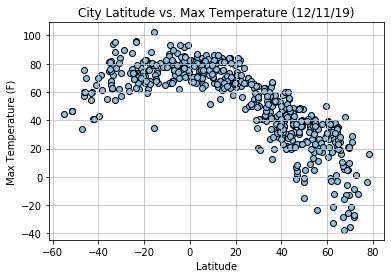

In [11]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], edgecolors="#000000", facecolors="#85C1E9")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True, which="major", axis="both", linestyle="-", color="#C0C0C0")
plt.savefig("analysis/figure_1.png")
plt.show()

#### Latitude vs. Humidity Plot

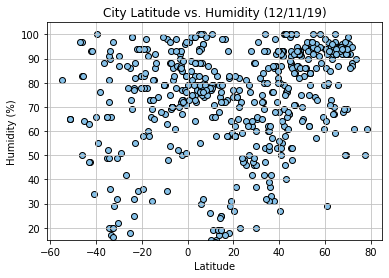

In [12]:
plt.scatter(city_df["Lat"], city_df["Humidity"], edgecolors="#000000", facecolors="#85C1E9")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True, which="major", axis="both", linestyle="-", color="#C0C0C0")
plt.savefig("analysis/figure_2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

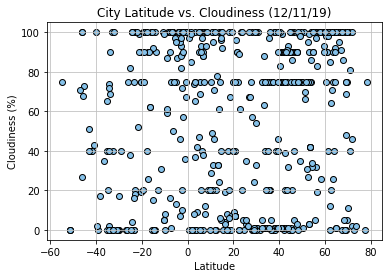

In [13]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], edgecolors="#000000", facecolors="#85C1E9")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True, which="major", axis="both", linestyle="-", color="#C0C0C0")
plt.savefig("analysis/figure_3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

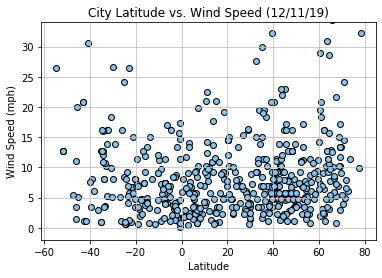

In [14]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], edgecolors="#000000", facecolors="#85C1E9")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True, which="major", axis="both", linestyle="-", color="#C0C0C0")
plt.savefig("analysis/figure_4.png")
plt.show()

Analysis

1. Temperature increases towards the equator.
2. The southern hemisphere tends to be more humid this time of year.
3. There is no strong correlation between latitude and cloudiness, though many cities are at 0% and 100%.
4. There is no strong correlation between latitude and wind speed, and wind speed tends to sit between 0mph and 10mph.